### Third Submission (Linear Classifier (Logistic/SVM) with Standardization)

- Standard missing value filling
- 'Cabin' is stripped, and then use Random Forest to predict the missing value for the stripped columns
- SimpleImputer for the simple imputing
- Standardization using StandardScaler
- Pipeline design to test either Logistic or SVM is used
- Standard get_dummies to encode
- Logistic Regression with Kfold and Gridsearch to find the best hyperparameter

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [2]:
train = pd.read_csv('train.csv')
train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [6]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [7]:
# fill the missing value with Earth for it is the Mode

train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
test['HomePlanet'] = test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])

In [8]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [9]:
# Do it for the rest I guess...

print(train.CryoSleep.value_counts()) # mode
print(train.Cabin.value_counts()) # reprocess
print(train.Destination.value_counts()) # mode
print(train.VIP.value_counts()) # mode

CryoSleep
False    5439
True     3037
Name: count, dtype: int64
Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
VIP
False    8291
True      199
Name: count, dtype: int64


In [10]:
train['deck'] = train['Cabin'].str[:1]
train['deck'].head()

print(train['deck'].value_counts())

deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64


In [11]:
train['side'] = train['Cabin'].str[-1:]
train['side'].head()

print(train['side'].value_counts())

side
S    4288
P    4206
Name: count, dtype: int64


In [12]:
#do for the test

test['deck'] = test['Cabin'].str[:1]
test['side'] = test['Cabin'].str[-1:]

In [13]:
train_new = train.drop('Cabin', axis = 1)
train_new.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
deck            199
side            199
dtype: int64

In [14]:
test_new = test.drop('Cabin', axis = 1)

In [15]:
train_new.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'deck', 'side'],
      dtype='object')

### Again with the task

In [17]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  deck          8494 non-null   object 
 14  side          8494 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [18]:
train_new = train_new.drop(columns=['PassengerId','Name'], axis=1)
test_new = test_new.drop(columns=['PassengerId','Name'], axis=1)

In [19]:
train_new = pd.get_dummies(train_new, columns=['HomePlanet','CryoSleep','Destination', 'VIP'])
test_new = pd.get_dummies(test_new, columns=['HomePlanet','CryoSleep','Destination', 'VIP'])

In [20]:
# true non null train

subtrain_no_null = train_new.dropna()
subtest_no_null = test_new.dropna()
subtrain_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7441 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        7441 non-null   float64
 1   RoomService                7441 non-null   float64
 2   FoodCourt                  7441 non-null   float64
 3   ShoppingMall               7441 non-null   float64
 4   Spa                        7441 non-null   float64
 5   VRDeck                     7441 non-null   float64
 6   Transported                7441 non-null   bool   
 7   deck                       7441 non-null   object 
 8   side                       7441 non-null   object 
 9   HomePlanet_Earth           7441 non-null   bool   
 10  HomePlanet_Europa          7441 non-null   bool   
 11  HomePlanet_Mars            7441 non-null   bool   
 12  CryoSleep_False            7441 non-null   bool   
 13  CryoSleep_True             7441 non-null   bool   
 1

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

X_train = subtrain_no_null.drop(columns=['Transported','side','deck'], axis=1)
y_train = subtrain_no_null[['deck']]

rf.fit(X_train, y_train)

subtrain_null = train_new[train_new['deck'].isnull()]
X_test = subtrain_null.drop(columns=['Transported','side','deck'], axis=1)
X_test = X_test.fillna(method='ffill')

deck_pred = rf.predict(X_test)
train_new.loc[train_new['deck'].isnull(), 'deck'] = deck_pred

C:\Users\Zak\AppData\Local\Temp\ipykernel_5496\228462837.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\Zak\AppData\Local\Temp\ipykernel_5496\228462837.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method='ffill')


In [22]:
# for the test data

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

X_train = subtest_no_null.drop(columns=['side','deck'], axis=1)
y_train = subtest_no_null[['deck']]

rf.fit(X_train, y_train)

subtest_null = test_new[test_new['deck'].isnull()]
X_test = subtest_null.drop(columns=['side','deck'], axis=1)
X_test = X_test.fillna(method='ffill')

deck_pred = rf.predict(X_test)
test_new.loc[test_new['deck'].isnull(), 'deck'] = deck_pred

C:\Users\Zak\AppData\Local\Temp\ipykernel_5496\1653368267.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\Zak\AppData\Local\Temp\ipykernel_5496\1653368267.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method='ffill')


In [23]:
train_new.isna().sum()

Age                          179
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Transported                    0
deck                           0
side                         199
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_False                0
CryoSleep_True                 0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
VIP_False                      0
VIP_True                       0
dtype: int64

In [24]:
rf = RandomForestClassifier()

X_train = subtrain_no_null.drop(columns=['Transported','side','deck'], axis=1)
y_train = subtrain_no_null[['side']]

rf.fit(X_train, y_train)

subtrain_null = train_new[train_new['side'].isnull()]
X_test = subtrain_null.drop(columns=['Transported','side','deck'], axis=1)
X_test = X_test.fillna(method='ffill')

side_pred = rf.predict(X_test)
train_new.loc[train_new['side'].isnull(), 'side'] = side_pred

C:\Users\Zak\AppData\Local\Temp\ipykernel_5496\3794531322.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\Zak\AppData\Local\Temp\ipykernel_5496\3794531322.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method='ffill')


In [25]:
# for the test data

rf = RandomForestClassifier()

X_train = subtest_no_null.drop(columns=['side','deck'], axis=1)
y_train = subtest_no_null[['side']]

rf.fit(X_train, y_train)

subtest_null = test_new[test_new['side'].isnull()]
X_test = subtest_null.drop(columns=['side','deck'], axis=1)
X_test = X_test.fillna(method='ffill')

side_pred = rf.predict(X_test)
test_new.loc[test_new['side'].isnull(), 'side'] = side_pred

C:\Users\Zak\AppData\Local\Temp\ipykernel_5496\1032908217.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\Zak\AppData\Local\Temp\ipykernel_5496\1032908217.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method='ffill')


In [26]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')

train_new['RoomService'] = si.fit_transform(train_new['RoomService'].values.reshape(-1, 1))
test_new['RoomService'] = si.transform(test_new['RoomService'].values.reshape(-1, 1))


train_new['FoodCourt'] = si.fit_transform(train_new['FoodCourt'].values.reshape(-1, 1))
test_new['FoodCourt'] = si.transform(test_new['FoodCourt'].values.reshape(-1, 1))


train_new['ShoppingMall'] = si.fit_transform(train_new['ShoppingMall'].values.reshape(-1, 1))
test_new['ShoppingMall'] = si.transform(test_new['ShoppingMall'].values.reshape(-1, 1))

train_new['Spa'] = si.fit_transform(train_new['Spa'].values.reshape(-1, 1))
test_new['Spa'] = si.transform(test_new['Spa'].values.reshape(-1, 1))

train_new['VRDeck'] = si.fit_transform(train_new['VRDeck'].values.reshape(-1, 1))
test_new['VRDeck'] = si.transform(test_new['VRDeck'].values.reshape(-1, 1))

si_age = SimpleImputer(strategy='most_frequent')
train_new['Age'] = si_age.fit_transform(train_new['Age'].values.reshape(-1, 1))
test_new['Age'] = si_age.transform(test_new['Age'].values.reshape(-1, 1))

train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   bool   
 7   deck                       8693 non-null   object 
 8   side                       8693 non-null   object 
 9   HomePlanet_Earth           8693 non-null   bool   
 10  HomePlanet_Europa          8693 non-null   bool   
 11  HomePlanet_Mars            8693 non-null   bool   
 12  CryoSleep_False            8693 non-null   bool   
 13  CryoSleep_True             8693 non-null   bool 

c:\Users\Zak\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


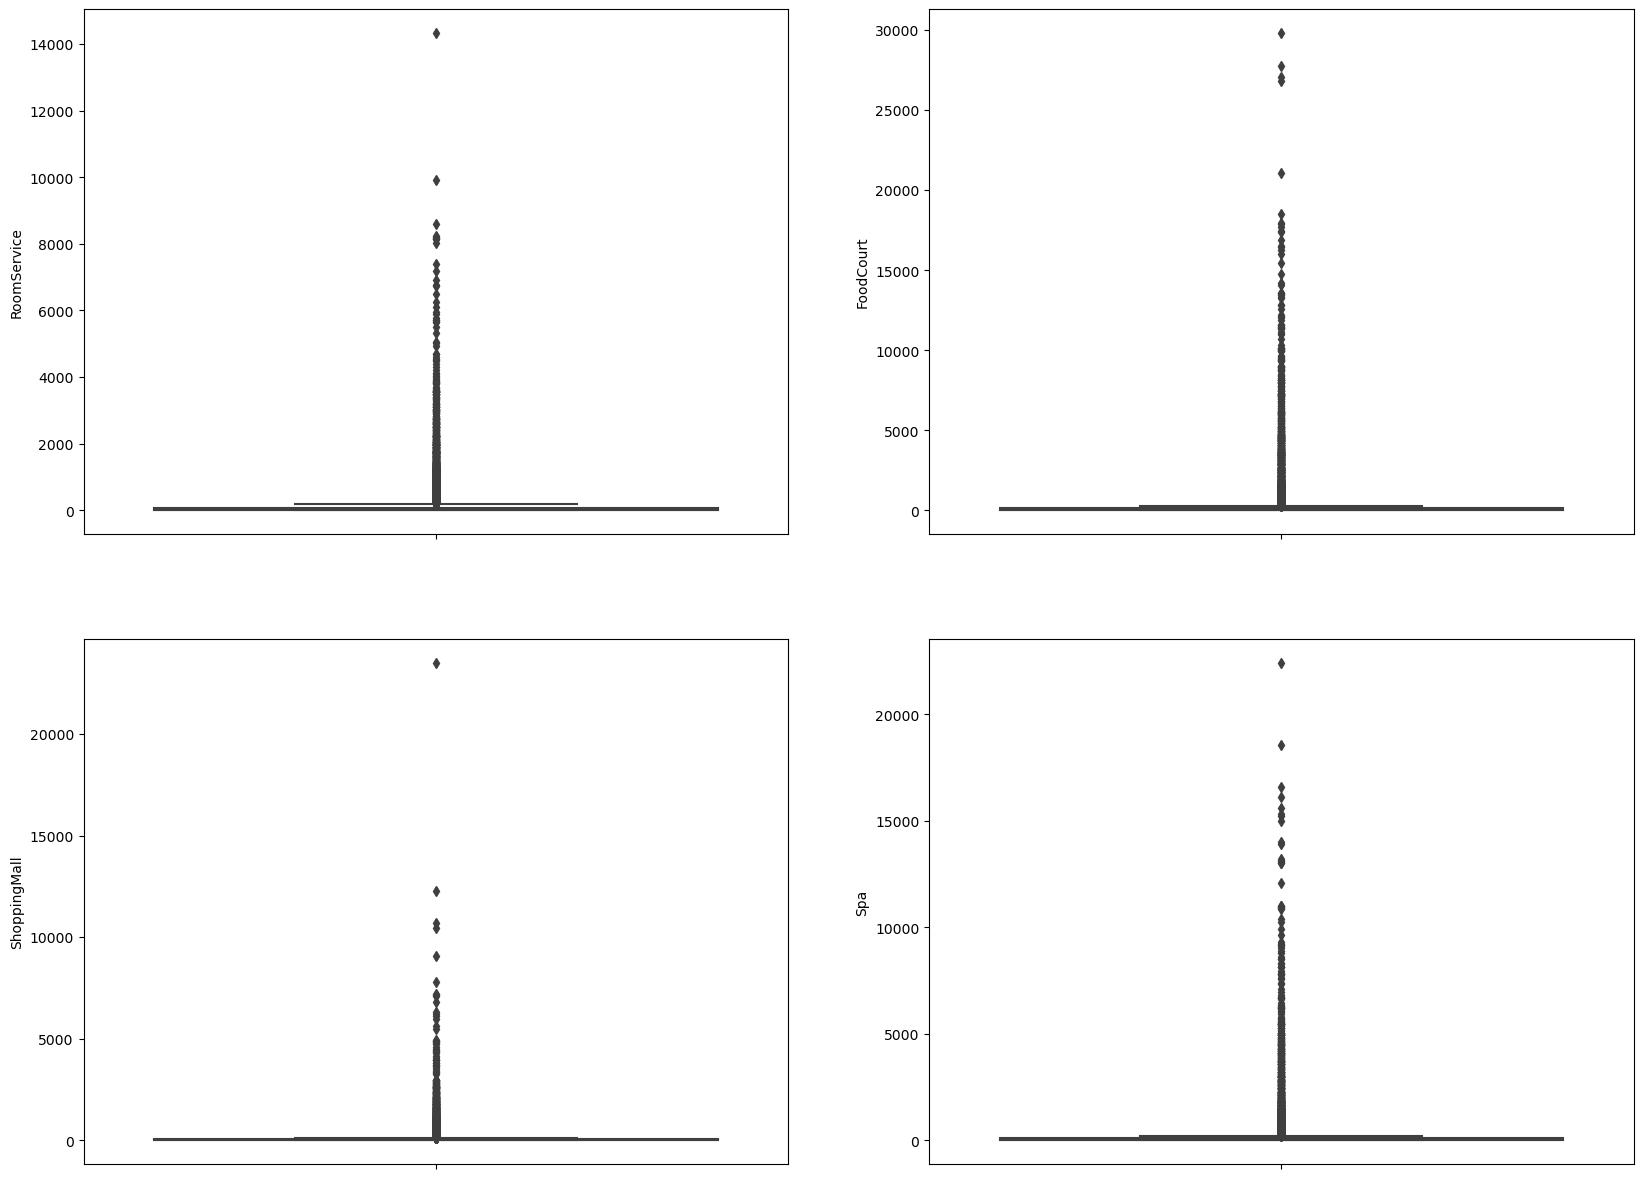

In [27]:

fig, ax = plt.subplots(2,2, figsize=(20,15))
sns.boxplot(train_new, y='RoomService', ax=ax[0][0])
sns.boxplot(train_new, y='FoodCourt', ax=ax[0][1])
sns.boxplot(train_new, y='ShoppingMall', ax=ax[1][0])
sns.boxplot(train_new, y='Spa', ax=ax[1][1])
plt.show()

### Too many outlier looks like???

In [28]:
train_new[['RoomService','Spa','FoodCourt','ShoppingMall','VRDeck']].describe()

,RoomService,Spa,FoodCourt,ShoppingMall,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,224.687617,311.138778,458.077203,173.729169,304.854791
std,659.739364,1124.675871,1594.434978,597.417440,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,89.000000,118.000000,45.000000,71.000000
max,14327.000000,22408.000000,29813.000000,23492.000000,24133.000000


I guess, standardization is must at this point

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_new[['RoomService','Spa','FoodCourt','ShoppingMall','VRDeck']] = scaler.fit_transform(train_new[['RoomService','Spa','FoodCourt','ShoppingMall','VRDeck']])
train_new.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,False,B,P,False,True,False,True,False,False,False,True,True,False
1,24.0,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,True,F,S,True,False,False,True,False,False,False,True,True,False
2,58.0,-0.275409,1.955616,-0.290817,5.694289,-0.225782,False,A,S,False,True,False,True,False,False,False,True,False,True
3,33.0,-0.340590,0.517406,0.330225,2.683471,-0.098708,False,A,S,False,True,False,True,False,False,False,True,True,False
4,16.0,0.118709,-0.243409,-0.038048,0.225732,-0.267258,True,F,S,True,False,False,True,False,False,False,True,True,False


In [30]:
train_new_final = pd.get_dummies(train_new, columns=['deck','side'])
test_new_final = pd.get_dummies(test_new, columns=['deck','side'])
train_new_final.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,39.0,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
1,24.0,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,True,True,False,False,...,False,False,False,False,False,True,False,False,False,True
2,58.0,-0.275409,1.955616,-0.290817,5.694289,-0.225782,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
3,33.0,-0.340590,0.517406,0.330225,2.683471,-0.098708,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
4,16.0,0.118709,-0.243409,-0.038048,0.225732,-0.267258,True,True,False,False,...,False,False,False,False,False,True,False,False,False,True


In [33]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Create a single pipeline step (e.g., 'model') that will be swapped out by the grid search
pipe = Pipeline([('model', SVC())])  # Initial model is just a placeholder

# Define the parameter grid, including model types and their respective hyperparameters
param_grid = [
    {
        'model': [SVC()],
        'model__C': [1, 10, 100],
        'model__kernel': ['linear', 'rbf']
    },
    {
        'model': [LogisticRegression()],
        'model__C': [0.1, 1, 10]
    }
]

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy')


In [34]:
X = train_new_final.drop('Transported', axis = 1)
y = train_new_final[['Transported']]

grid_search.fit(X,y)

c:\Users\Zak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Zak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Zak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Zak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', SVC())]),
             param_grid=[{'model': [SVC(C=100, kernel='linear')],
                          'model__C': [1, 10, 100],
                          'model__kernel': ['linear', 'rbf']},
                         {'model': [LogisticRegression()],
                          'model__C': [0.1, 1, 10]}],
             scoring='accuracy')

In [64]:
# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best score
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.7913282966878443


In [65]:
X.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F',
       'deck_G', 'deck_T', 'side_P', 'side_S'],
      dtype='object')

In [66]:
test_new_final.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F',
       'deck_G', 'deck_T', 'side_P', 'side_S'],
      dtype='object')

In [67]:
optimal_model = LogisticRegression(C= 10, penalty= 'l2', solver = 'liblinear')

optimal_model.fit(X,y)

y_pred = optimal_model.predict(test_new_final)

c:\Users\Zak\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
feature_importance = pd.DataFrame({'Feature':X.columns, 'Importance':optimal_model.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False).head()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [69]:
test['Transported'] = y_pred

final_submission = test[['PassengerId','Transported']]
final_submission.set_index('PassengerId', inplace=True)
print(final_submission.head())
print(final_submission.shape)



             Transported
PassengerId             
0013_01            False
0018_01            False
0019_01             True
0021_01             True
0023_01             True
(4277, 1)


In [62]:
final_submission.to_csv('submission_3_1.csv')

In [36]:
# # reindexing

# rescaledX_test = rescaledX_test.reindex(
#     columns=rescaledX_train.columns, fill_value=0
# )